In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix

In [2]:
# Loading in Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
# Split to train and validation, also normalizing and converting to double precision
X_valid = X_train_full[:5000] / 255.0
X_train = X_train_full[5000:] / 255.0
X_test = X_test / 255.0

y_valid = y_train_full[:5000]
y_train = y_train_full[5000:]


In [ ]:
# Creates new axis so data can be used in training for CNN
X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [4]:
# Fully Connected Neural Network Architecture
from functools import partial

# Creates layer template for Fully Connected Neural Network
my_dense_layer = partial(tf.keras.layers.Dense, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.0001))

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    my_dense_layer(400),
    my_dense_layer(128),
    my_dense_layer(10, activation="softmax")
])

In [6]:
# Convolutional Neural Network Architecture
from functools import partial

my_dense_layer = partial(tf.keras.layers.Dense, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.0001))

my_conv_layer = partial(tf.keras.layers.Conv2D, activation="relu")


model = tf.keras.models.Sequential([
    my_conv_layer(32,3,input_shape=[28,28,1]),
    my_conv_layer(64,3),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    my_dense_layer(128),
    my_dense_layer(10, activation="softmax"),
    ])


In [6]:
# Initializing loss function and optimizer
model.compile(loss="sparse_categorical_crossentropy",
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
             metrics=["accuracy"])

In [7]:
# Training the data, checking validation to prevent overfit
history = model.fit(X_train, y_train, epochs=15, validation_data=(X_valid,y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/15
55000/55000 [==============================] - 22s 395us/sample - loss: 0.6586 - accuracy: 0.8057 - val_loss: 0.5044 - val_accuracy: 0.8504
Epoch 2/15
55000/55000 [==============================] - 18s 334us/sample - loss: 0.4748 - accuracy: 0.8577 - val_loss: 0.4466 - val_accuracy: 0.8746
Epoch 3/15
55000/55000 [==============================] - 20s 358us/sample - loss: 0.4343 - accuracy: 0.8701 - val_loss: 0.4207 - val_accuracy: 0.8742
Epoch 4/15
55000/55000 [==============================] - 20s 362us/sample - loss: 0.4086 - accuracy: 0.8782 - val_loss: 0.4448 - val_accuracy: 0.8694
Epoch 5/15
55000/55000 [==============================] - 19s 345us/sample - loss: 0.3896 - accuracy: 0.8844 - val_loss: 0.4019 - val_accuracy: 0.8830
Epoch 6/15
55000/55000 [==============================] - 18s 333us/sample - loss: 0.3744 - accuracy: 0.8904 - val_loss: 0.4068 - val_accuracy: 0.8820
Epoch 7/15
55000/55000 [=====================

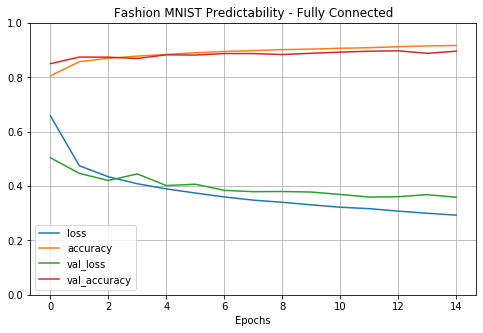

In [8]:
# Plot results from training
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.title("Fashion MNIST Predictability - Fully Connected")
plt.xlabel("Epochs")
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [9]:
# Confusion matrix of data in training
y_pred = model.predict_classes(X_train)
conf_train = confusion_matrix(y_train, y_pred)
print(conf_train)

[[4962    5  101   88   10    1  370    1    5    0]
 [   4 5380    5   42    5    0    4    0    2    2]
 [  39    2 5074   40  212    0  124    1    4    0]
 [  62   26   46 5151  141    1   69    0    2    1]
 [   3    8  635  148 4494    0  215    0    9    0]
 [   1    0    0    0    0 5325    0  164    4   13]
 [ 497    4  551   90  219    0 4134    0   12    0]
 [   0    0    0    0    0    3    0 5414    2   69]
 [   7    3   22    9   10    0   12    9 5437    1]
 [   0    0    0    0    0    3    0  181    1 5309]]


In [10]:
# Evaluating the model for test data
model.evaluate(X_test,y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.39161823155879977, 0.885]

In [11]:
# Confusion matrix for test data
y_pred = model.predict_classes(X_test)
conf_test = confusion_matrix(y_test, y_pred)
print(conf_test)

[[853   1  26  19   3   2  92   0   4   0]
 [  2 972   2  20   2   0   2   0   0   0]
 [ 17   0 880  12  55   0  36   0   0   0]
 [ 18   8  18 902  27   0  23   0   4   0]
 [  0   1 158  31 757   0  51   0   2   0]
 [  0   0   0   1   0 947   0  39   1  12]
 [125   1 130  28  58   0 649   0   9   0]
 [  0   0   0   0   0   6   0 978   0  16]
 [  5   0   8   7   3   1   6   5 965   0]
 [  0   0   0   0   0   8   1  44   0 947]]


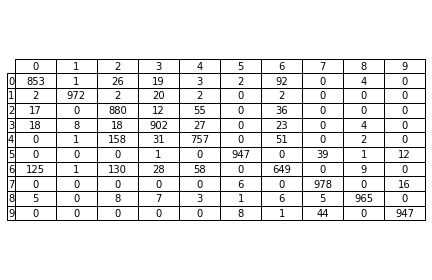

In [12]:
# Create dataframe for confusion matrix
fig, ax = plt.subplots()

# hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

# create table and save to file
df = pd.DataFrame(conf_test)
ax.table(cellText=df.values, rowLabels=np.arange(10), colLabels=np.arange(10), loc='center', cellLoc='center')
fig.tight_layout()
plt.savefig('conf_mat.pdf')